In [1]:
# Import packages


import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '/home/ec2-user/SageMaker/mymodule/')

from common_functions import psi
from common_functions import ks
from impute_functions import setMax

%matplotlib inline

import boto3
import _pickle as cpickle
# !pip install xgboost==0.90
# !pip install scorecardpy



In [2]:

#old s3_source_path='s3://mf-ml-ds/propensity_to_pay/Monthly_Validation/val_202009/'
YYYYMM = '202012'
bucket_name = 'mf-ml-ds'
s3_source = 's3://'+ bucket_name +'/propensity_to_fund/model_monitor/val_'
s3_source_path  = s3_source + YYYYMM
s3_score_target  = 'propensity_to_fund/model_monitor/val_' + YYYYMM +'/'
s3_score_output = 'propensity_to_fund/output/'

psi_file_path = 's3://'+ bucket_name + '/' + s3_score_target
model_path = 'propensity_to_fund/final_model/'

s3 = boto3.resource('s3')

In [3]:
def upload_model(model, model_name):
    with open(model_name, 'wb') as f:
        cpickle.dump(model, f)
    s3.meta.client.upload_file(model_name, bucket_name, model_path + model_name)


In [4]:
def upload_file(df_file, file_name):
    #psi_file_name = 'pot30_xgb_psi.xlsx'
    df_file.to_excel(file_name)
    s3.meta.client.upload_file(file_name, bucket_name , s3_score_output + file_name)

In [5]:
def download_model(model_name):
    #model_name = 'slowsecure_xgb_model_w'
    s3.meta.client.download_file(bucket_name, model_path + model_name, model_name)
    with open(model_name, 'rb') as f:
        xgb = cpickle.load(f)
        return xgb

In [6]:
#read in the csv model development data
df=pd.read_csv('s3://mf-ml-ds/propensity_to_fund/source/ppf_dev3.csv')
df.shape

(250837, 54)

In [7]:

list(df)


['age',
 'req_loan_amt',
 'self_rpt_mortgage_or_rental',
 'self_rpt_years_at_current_a',
 'distancetobranch',
 'No_of_open_home_equity_accou',
 'mortgage_accts_opened_within',
 'tot_joint_mortgage_pmt',
 'mth_since_most_rec_acct_o0',
 'mth_since_most_rec_acct_18',
 'pmt_non_mortgage_closed',
 'maxhigh_credit_installment_',
 'tot_open_to_buy_bankcard_ope',
 'min_current_bal_revolvin',
 'tot_credit_limit_revolving_o',
 'pct_of_open_bkcd_gt_75pct_0',
 'current_bal_revolving_closed',
 'current_bal_personal_loan_in',
 'worst_lst_rpt_current_rate',
 'ratio_of_satisfactory_accts_',
 'ninety_dlq_all_lst_6_',
 'sixty_dlq_all_lst_3_m',
 'thirty_dlq_all_lst_1_',
 'sixty_plus_dlq_all_la4',
 'No_of_opened_accts_credit',
 'No_of_opened_accts_person',
 'No_of_opened_accts_revo16',
 'No_of_opened_accts_all_l8',
 'bkcy_accts_ch7_13_all_7',
 'bkcy_public_recs_all_a3',
 'repo_all_lst_60_mth',
 'coll_gt_300_non_medical_2',
 'mth_since_most_rec_non_finan',
 'mth_since_most_rec_credit_ca',
 'credit_inq_reta

In [8]:
df_s=df.drop(['FPD_flag','ever60by4_flag'], axis=1)

In [5]:

import scorecardpy as sc
#filter variable via missing rate, iv, identcal value rate
# dt_s=sc.var_filter(df, y='fund_flag', iv_limit=0.01,missing_limit = 0.95, identical_limit = 0.95)

bins=sc.woebin(df_s, y="fund_flag", positive = "fund|1")

[INFO] creating woe binning ...
Binning on 250837 rows and 51 columns in 00:00:47


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figu

{'source_CK_API': <Figure size 432x288 with 2 Axes>,
 'worst_lst_rpt_current_rate': <Figure size 432x288 with 2 Axes>,
 'current_bal_revolving_closed': <Figure size 432x288 with 2 Axes>,
 'utm_medium_priority': <Figure size 432x288 with 2 Axes>,
 'bkcy_accts_ch7_13_all_7': <Figure size 432x288 with 2 Axes>,
 'No_of_accts_misc_open': <Figure size 432x288 with 2 Axes>,
 'sixty_dlq_all_lst_3_m': <Figure size 432x288 with 2 Axes>,
 'credit_inq_retail_lst_6_m': <Figure size 432x288 with 2 Axes>,
 'mortgage_accts_opened_within': <Figure size 432x288 with 2 Axes>,
 'SR_empstatus_Hourly': <Figure size 432x288 with 2 Axes>,
 'SR_OthResi': <Figure size 432x288 with 2 Axes>,
 'No_of_accts_sec_closed': <Figure size 432x288 with 2 Axes>,
 'age': <Figure size 432x288 with 2 Axes>,
 'ref_code_priority': <Figure size 432x288 with 2 Axes>,
 'maxhigh_credit_installment_': <Figure size 432x288 with 2 Axes>,
 'SR_Hownership_Home': <Figure size 432x288 with 2 Axes>,
 'current_bal_personal_loan_in': <Figure

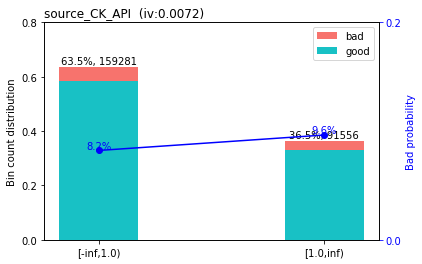

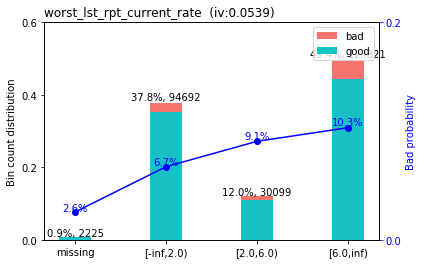

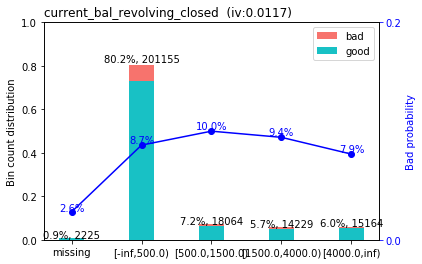

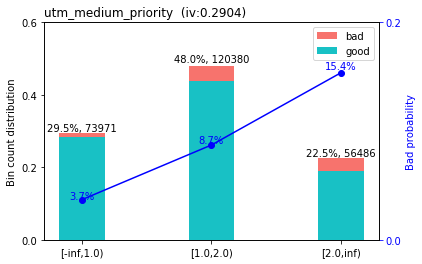

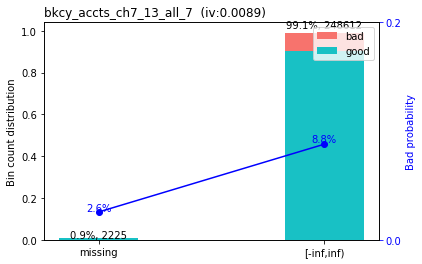

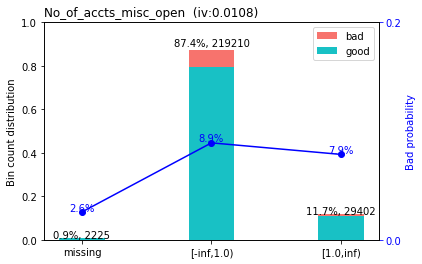

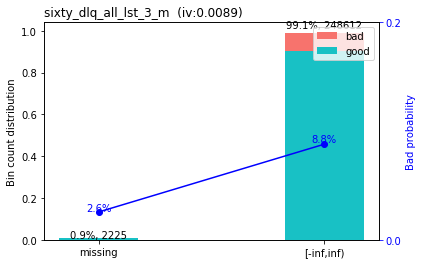

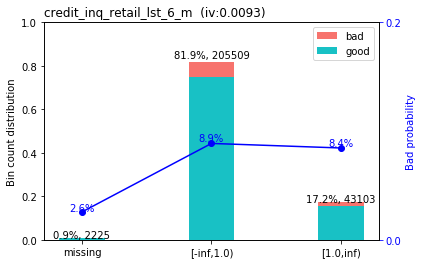

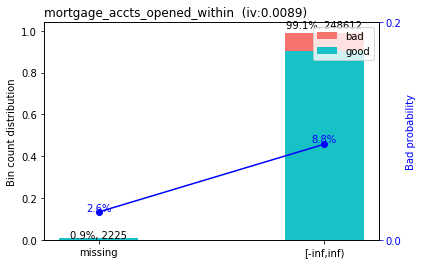

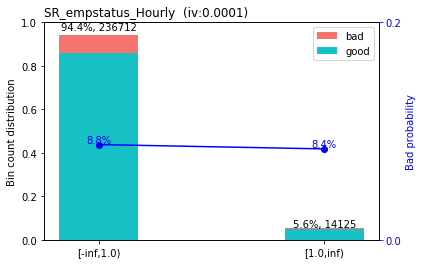

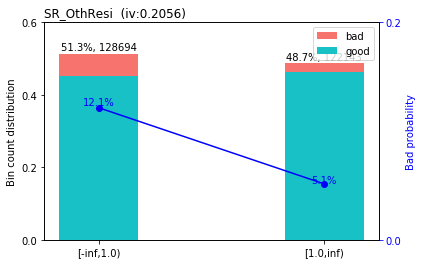

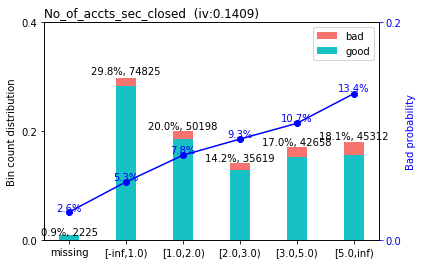

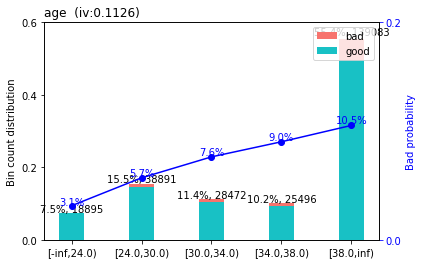

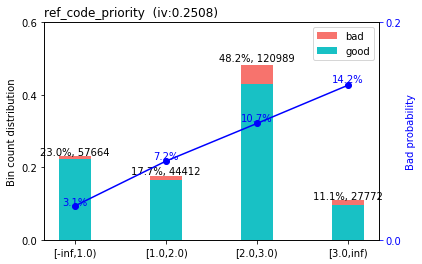

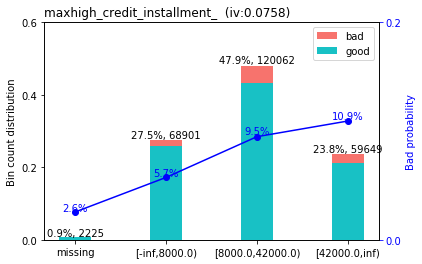

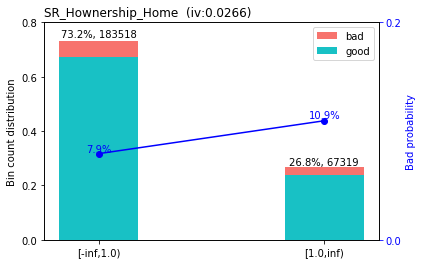

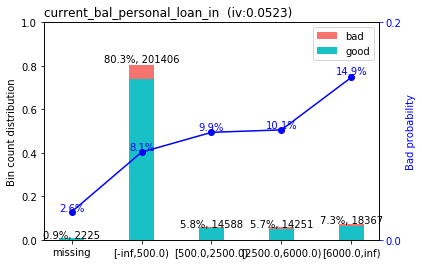

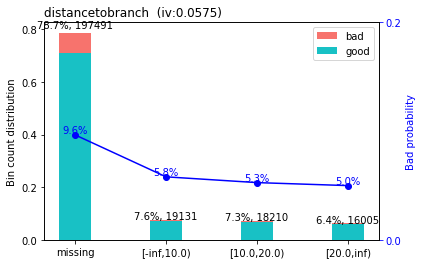

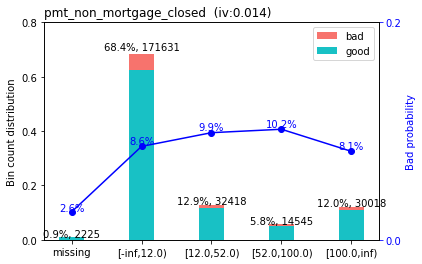

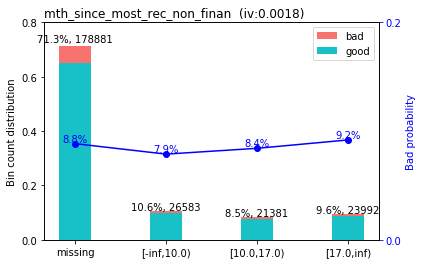

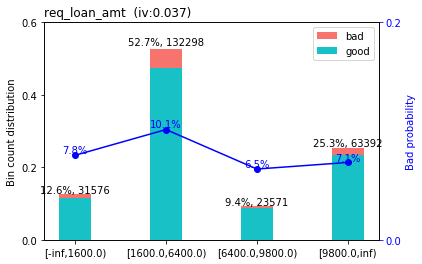

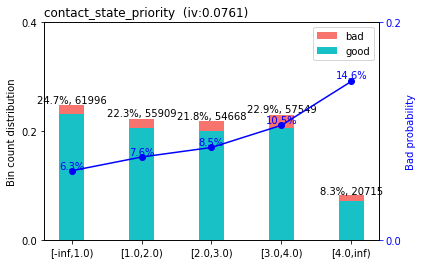

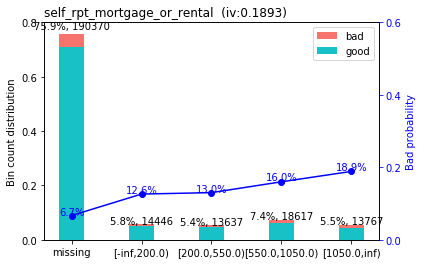

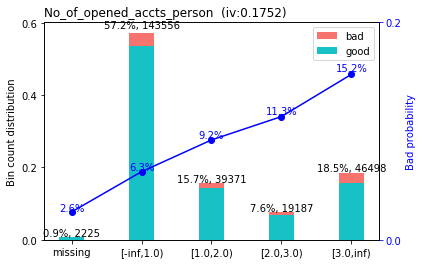

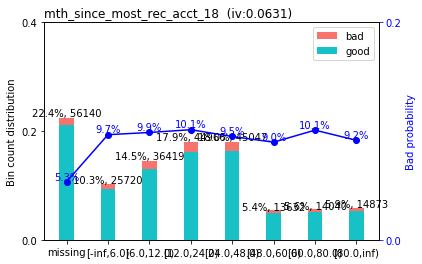

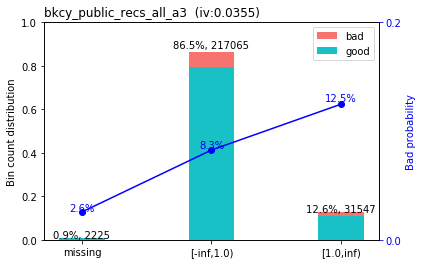

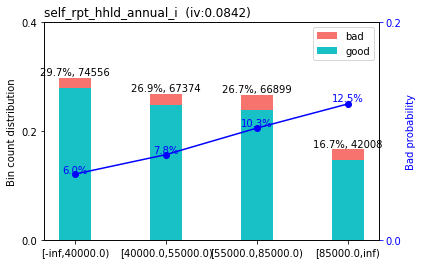

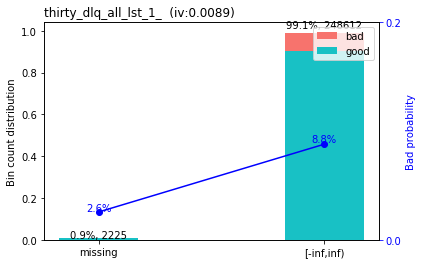

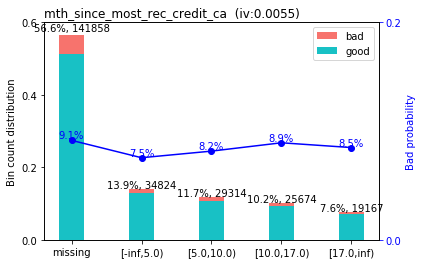

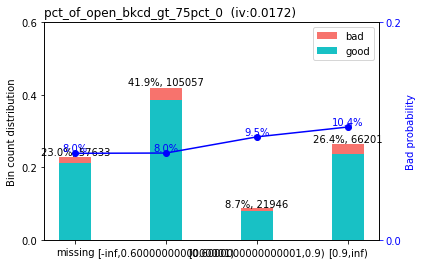

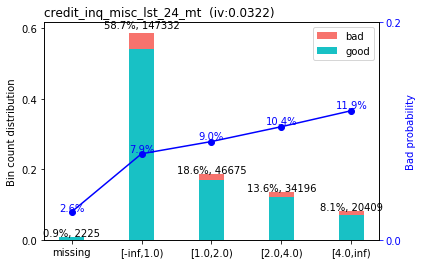

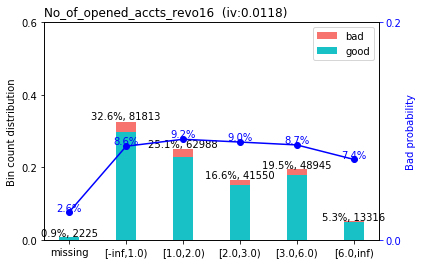

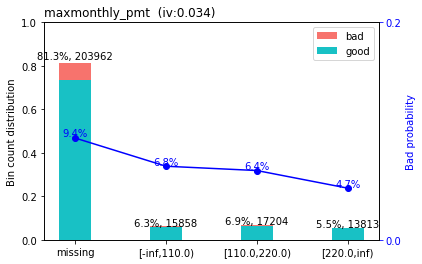

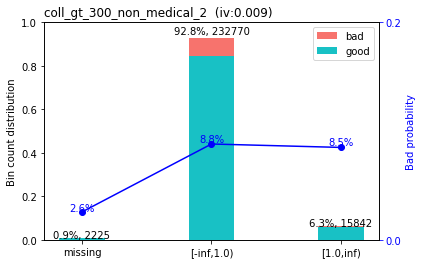

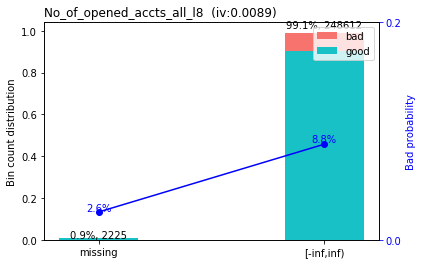

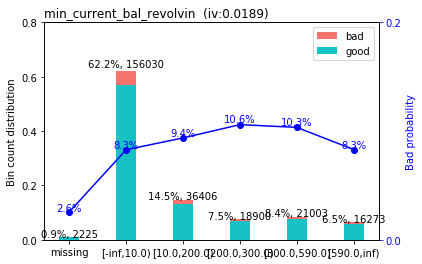

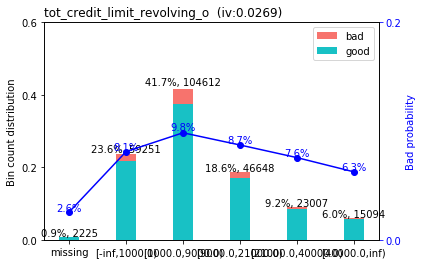

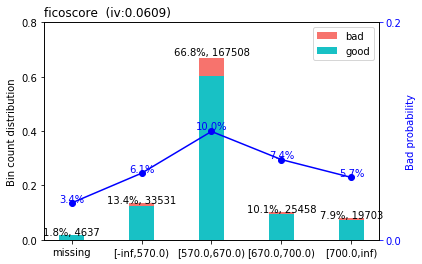

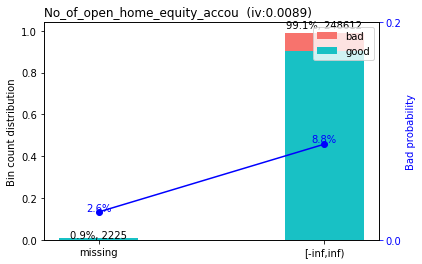

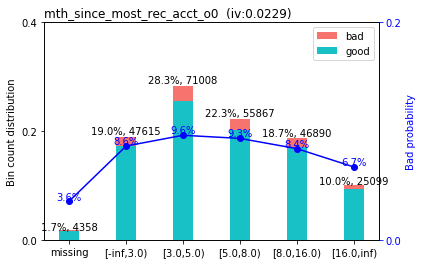

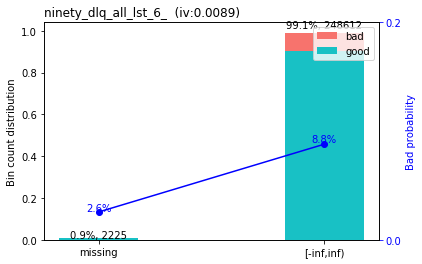

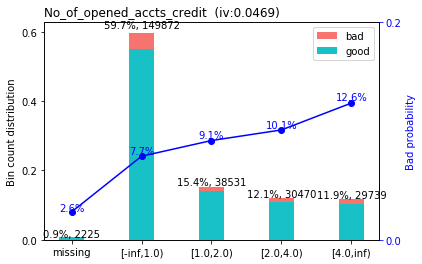

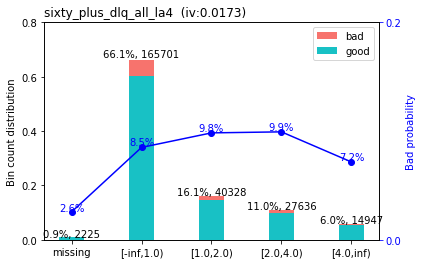

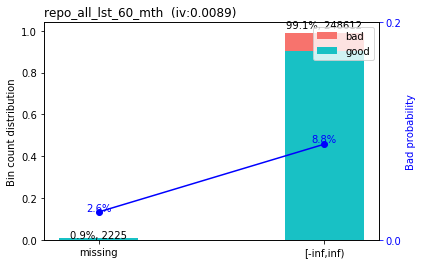

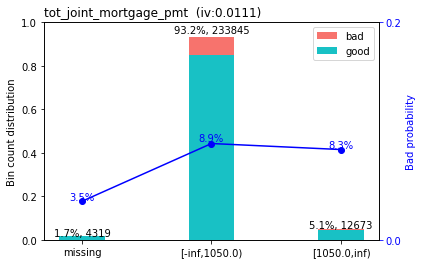

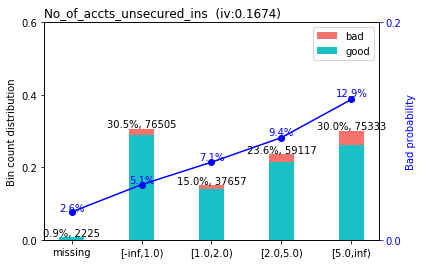

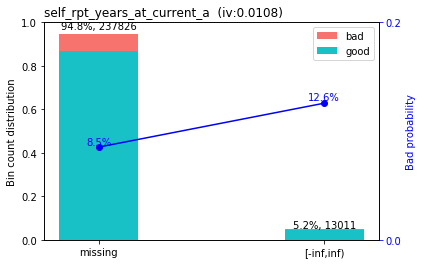

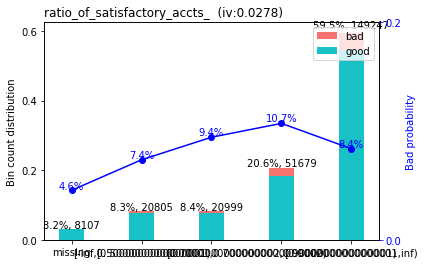

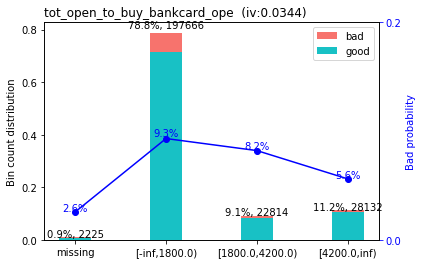

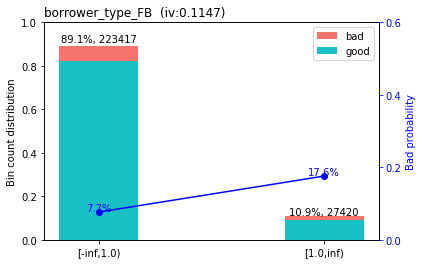

In [6]:
sc.woebin_plot(bins)


In [9]:
#apply the p1 p99 first then do the missing impute with max (p99) value or min value (p1), all data is capped at p99
ptable = pd.DataFrame()

for col in df.columns:
    percentiles = df[col].quantile([0.01,0.99]).values
    ptable[col]=percentiles
    
    
    

In [79]:
ptable.to_csv('../propensity_to_fund/model_monitor/capfloor.csv', index=False)


In [10]:
        
def impute_ppf(df, ptable):
    for col in df.columns:
        p1 = ptable[col].min()
        p99= ptable[col].max()
        
    
        df.loc[df[col] <= p1, col] = p1
        df.loc[df[col] >= p99, col] = p99    

    items=['req_loan_amt','sixty_plus_dlq_all_la4', 'tot_open_to_buy_bankcard_ope','tot_open_to_buy_bankcard_ope','coll_gt_300_non_medical_2', 
       'credit_inq_retail_lst_6_m','mth_since_most_rec_non_finan',  'mth_since_most_rec_credit_ca',
       'tot_credit_limit_revolving_o','current_bal_revolving_closed','mth_since_most_rec_acct_o0',
       'pmt_non_mortgage_closed','ficoscore','tot_joint_mortgage_pmt']
    for item in items:
        setMax(df, ptable, item)  
        
# impute_ppf(df, ptable)

In [11]:
# impute all the missing value with 0
df=df.fillna(0)


In [12]:
#check the mean of each variable by the group by bad performance variable
df.groupby('fund_flag').mean()


,age,req_loan_amt,self_rpt_mortgage_or_rental,self_rpt_years_at_current_a,distancetobranch,No_of_open_home_equity_accou,mortgage_accts_opened_within,tot_joint_mortgage_pmt,mth_since_most_rec_acct_o0,mth_since_most_rec_acct_18,...,SR_empstatus_Hourly,SR_Hownership_Home,SR_OthResi,source_CK_API,contact_state_priority,ref_code_priority,utm_medium_priority,FPD_flag,ever60by4_flag,distancetobranch_Z
fund_flag,,,,,,,,,,,,,,,,,,,,,
0,41.248756,5794.558651,605.272118,0.307820,4.142629,0.012292,0.046741,114.385676,7.77226,23.73153,...,0.056543,0.26187,0.506122,0.361392,1.646624,1.436103,0.897638,2.000000,2.000000,0.779480
1,44.583554,5405.836452,1498.300310,0.510131,2.203979,0.015013,0.074519,108.161449,6.93689,26.02017,...,0.053892,0.33636,0.286575,0.402711,1.998814,1.868623,1.271425,0.012458,0.081044,0.869307


In [37]:
df.groupby('SR_Hownership_Home').mean()['fund_flag']

SR_Hownership_Home
0    0.079246
1    0.109494
Name: fund_flag, dtype: float64

In [38]:
df.groupby('SR_empstatus_Hourly').mean()['fund_flag']

SR_empstatus_Hourly
0    0.087587
1    0.083611
Name: fund_flag, dtype: float64

In [118]:
#split the model development sample into train and test sample
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df.drop(['fund_flag','FPD_flag','ever60by4_flag','SR_OthResi'], axis='columns'), df.fund_flag, test_size=0.3)

In [136]:
from xgboost import XGBClassifier

XGB=XGBClassifier(n_estimators=100, min_samples_leaf=5, class_weight="balanced_subsample", randomstate=42)
XGB.fit(X_train, y_train)

XGB.score(X_test,y_test)



0.9141816828788604

In [120]:
#check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X=add_constant(X_train)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index= X.columns)

const                           68.694232
age                              1.149630
req_loan_amt                     1.134960
self_rpt_mortgage_or_rental      1.001978
self_rpt_years_at_current_a      1.135582
distancetobranch                 1.192207
No_of_open_home_equity_accou     1.192468
mortgage_accts_opened_within     1.293345
tot_joint_mortgage_pmt           1.566905
mth_since_most_rec_acct_o0       1.180980
mth_since_most_rec_acct_18       1.083050
pmt_non_mortgage_closed          1.028550
maxhigh_credit_installment_      2.201935
tot_open_to_buy_bankcard_ope     1.731391
min_current_bal_revolvin         1.027383
tot_credit_limit_revolving_o     2.256137
pct_of_open_bkcd_gt_75pct_0      1.187396
current_bal_revolving_closed     1.077196
current_bal_personal_loan_in     1.119784
worst_lst_rpt_current_rate       1.575472
ratio_of_satisfactory_accts_     2.626918
ninety_dlq_all_lst_6_            1.062824
sixty_dlq_all_lst_3_m            1.084811
thirty_dlq_all_lst_1_            1

In [121]:
feat_importances=pd.Series(XGB.feature_importances_, index=X_train.columns)
dropvar=feat_importances[feat_importances==0]
dropvar


ninety_dlq_all_lst_6_    0.0
dtype: float32

In [124]:
#drop two variables that has a higher than 10 vif value
# X_train2=X_train.drop(dropvar.index, axis=1)
# X_test2=X_test.drop(dropvar.index, axis=1)

#no variables need to be dropped
# X_train2=X_train.drop(['distancetobranch_Z'], axis=1)
# X_test2=X_test.drop(['distancetobranch_Z'], axis=1)

X_train2=X_train
X_test2=X_test




In [128]:
XGB.fit(X_train2, y_train)

XGB.score(X_test2,y_test)


0.9119491840748418

In [129]:
len(X_train2.columns)

50

In [116]:
import statsmodels.api as sm

#fit the final model

X_final=sm.add_constant(X_train2)
model_final=sm.OLS(y_train, X_final).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              fund_flag   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     237.8
Date:                Fri, 03 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:09:58   Log-Likelihood:                -21315.
No. Observations:              175585   AIC:                         4.273e+04
Df Residuals:                  175534   BIC:                         4.325e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.1042      0.005    -19.078      0.000      -0.115      -0.094
age                              0.0007   4.52e-05     16.586      0.000       0.001       0.001
req_loan_amt                 -3.677e-06      2e-07    -18.360      0.000   -4.07e-06   -3.28e-06
self_rpt_mortgage_or_rental   2.524e-08   2.05e-08      1.231      0.218   -1.49e-08    6.54e-08
self_rpt_years_at_current_a      0.0015      0.000      4.525      0.000       0.001       0.002
distancetobranch             -6.044e-05   3.74e-05     -1.616      0.106      -0.000    1.29e-05
No_of_open_home_equity_accou     0.0162      0.006      2.658      0.008       0.004       0.028
mortgage_accts_opened_within     0.0141      0.003      4.675      0.000       0.008       0.020
tot_joint_mortgage_pmt       -2.344e-05   1.82e-06    -12.846      0.000    -2.7e-05   -1.99e-05
mth_since_most_rec_acct_o0      -0.0004   6.27e-05     -5.802      0.000      -0.000      -0.000
mth_since_most_rec_acct_18    5.077e-05   2.28e-05      2.229      0.026    6.12e-06    9.54e-05
pmt_non_mortgage_closed      -2.211e-07   5.64e-07     -0.392      0.695   -1.33e-06    8.84e-07
maxhigh_credit_installment_   9.699e-08    1.3e-08      7.472      0.000    7.15e-08    1.22e-07
tot_open_to_buy_bankcard_ope  -2.93e-07   1.34e-07     -2.188      0.029   -5.55e-07   -3.06e-08
min_current_bal_revolvin     -4.587e-07    6.2e-07     -0.740      0.460   -1.67e-06    7.57e-07
tot_credit_limit_revolving_o -3.589e-07   4.54e-08     -7.912      0.000   -4.48e-07    -2.7e-07
pct_of_open_bkcd_gt_75pct_0      0.0079      0.002      4.768      0.000       0.005       0.011
current_bal_revolving_closed -1.041e-06   1.61e-07     -6.468      0.000   -1.36e-06   -7.25e-07
current_bal_personal_loan_in  2.764e-06   1.98e-07     13.929      0.000    2.38e-06    3.15e-06
worst_lst_rpt_current_rate       0.0037      0.000     10.826      0.000       0.003       0.004
ratio_of_satisfactory_accts_     0.0388      0.004      9.035      0.000       0.030       0.047
ninety_dlq_all_lst_6_           -0.0100      0.004     -2.731      0.006      -0.017      -0.003
sixty_dlq_all_lst_3_m           -0.0359      0.004     -8.756      0.000      -0.044      -0.028
thirty_dlq_all_lst_1_           -0.0306      0.004     -7.243      0.000      -0.039      -0.022
sixty_plus_dlq_all_la4          -0.0055      0.001    -10.952      0.000      -0.006      -0.005
No_of_opened_accts_credit        0.0018      0.000      7.551      0.000       0.001       0.002
No_of_opened_accts_person        0.0002      0.000      0.950      0.342      -0.000       0.001
No_of_opened_accts_revo16       -0.0039      0.000    -10.274      0.000      -0.005      -0.003
No_of_opened_accts_all_l8       -0.0115      0.003     -3.487      0.000    

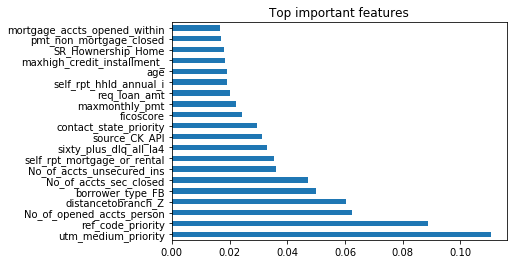

In [130]:
#rank order the variable importance
feat_importances=pd.Series(XGB.feature_importances_, index=X_train2.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Top important features')
plt.show()


In [91]:
combine=[*feat_importances.index, *['fund_flag']]


df_plot=df[combine]


[INFO] creating woe binning ...
Binning on 250837 rows and 50 columns in 00:00:50
[INFO] The breaks_list is saved as breaks_list_20210208_210030.py


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figu

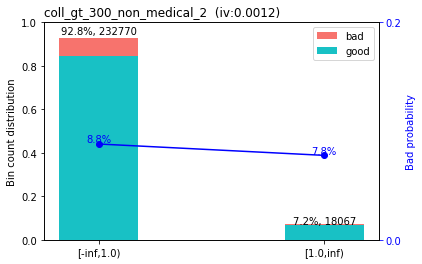

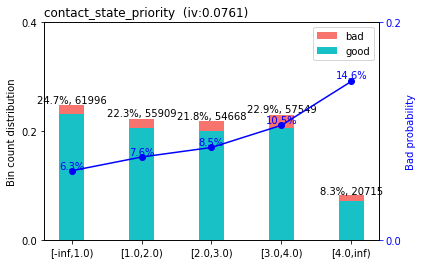

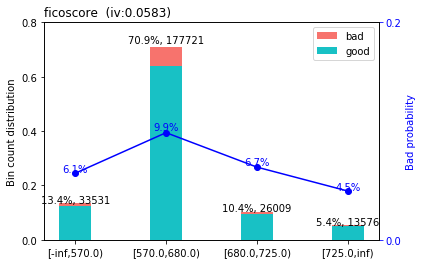

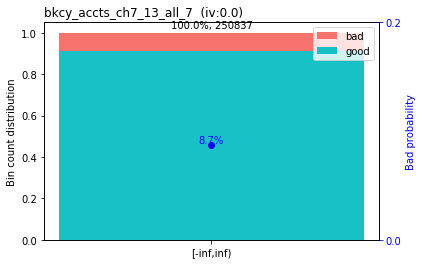

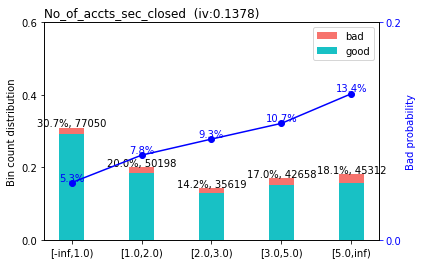

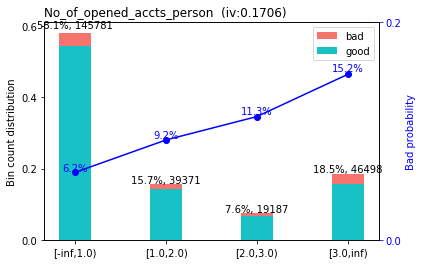

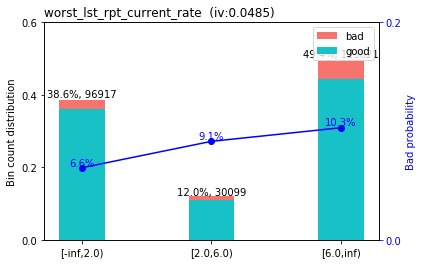

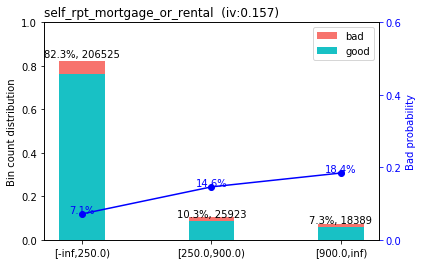

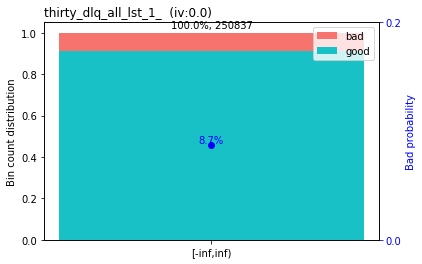

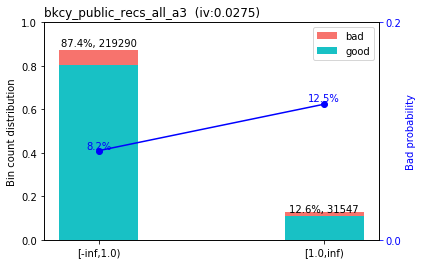

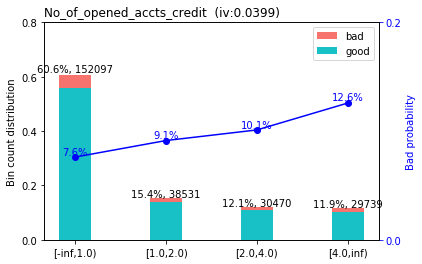

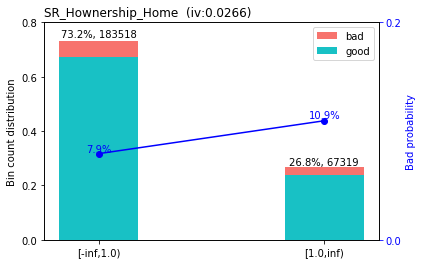

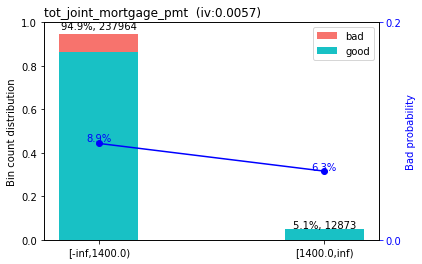

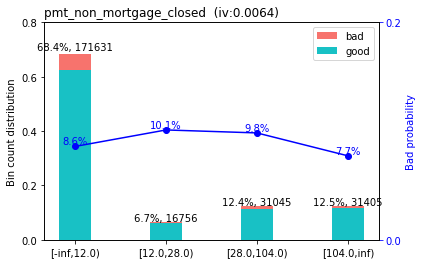

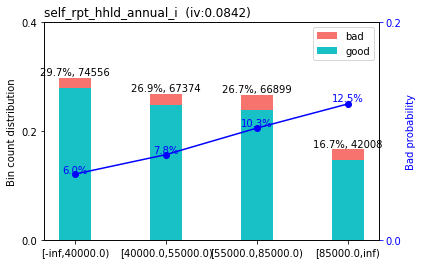

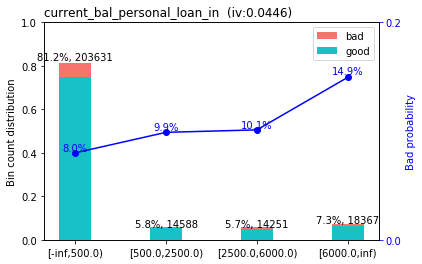

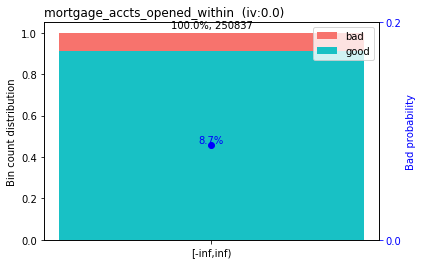

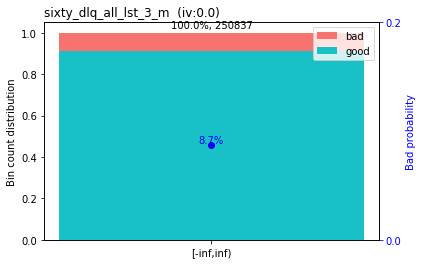

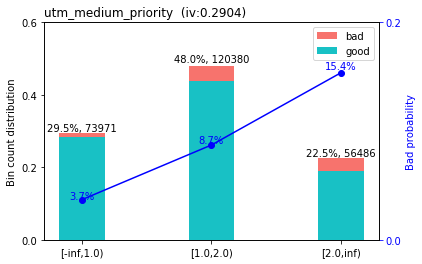

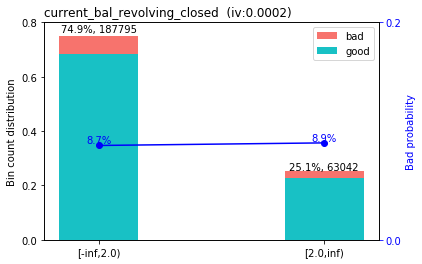

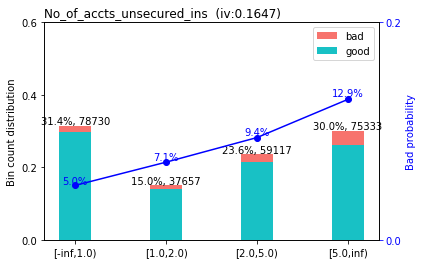

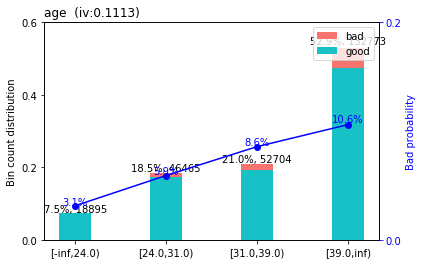

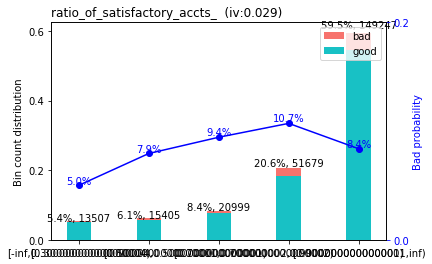

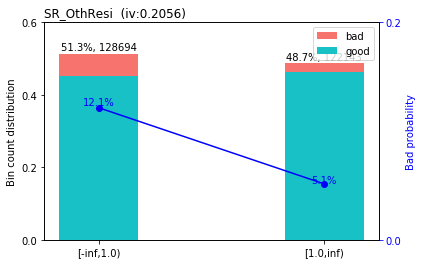

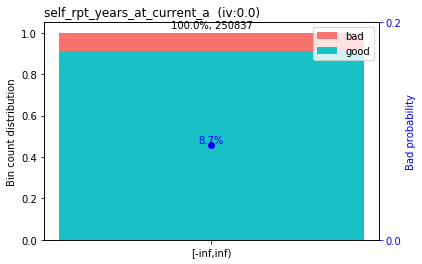

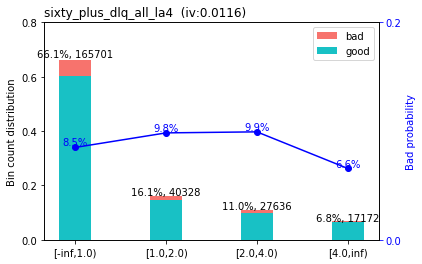

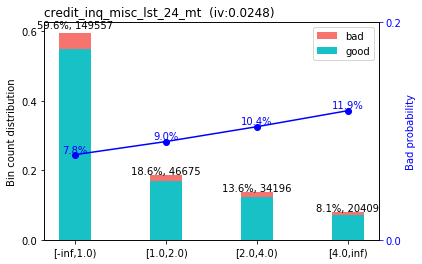

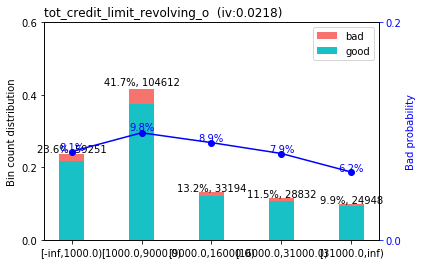

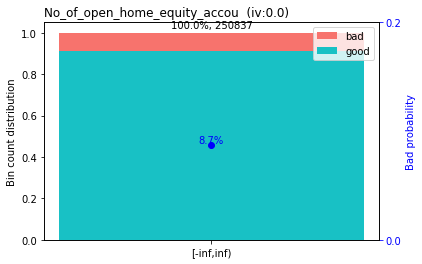

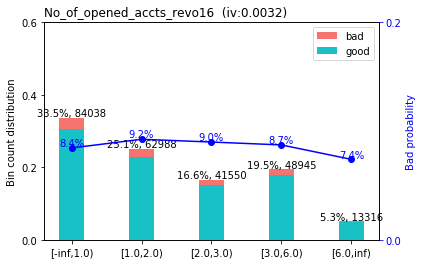

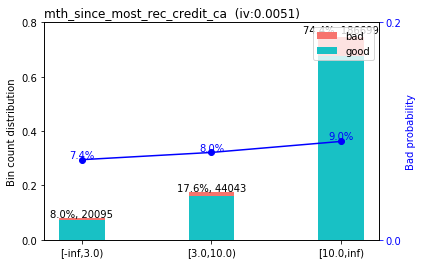

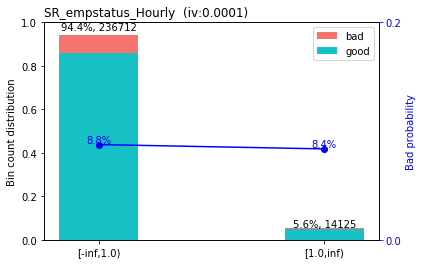

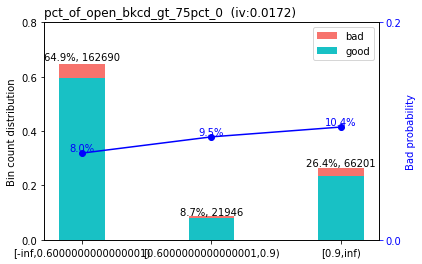

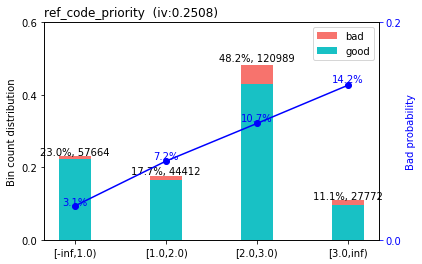

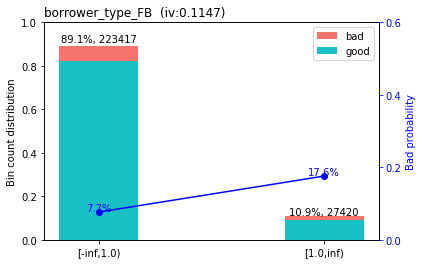

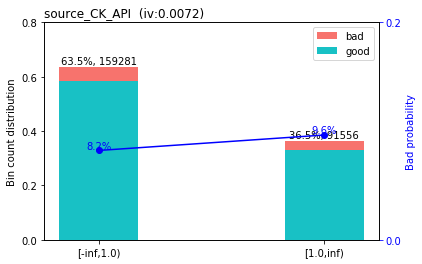

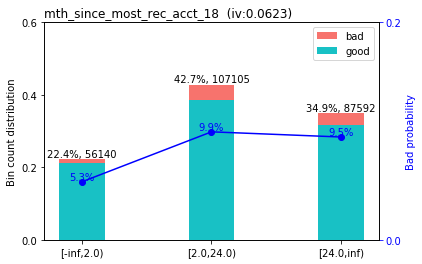

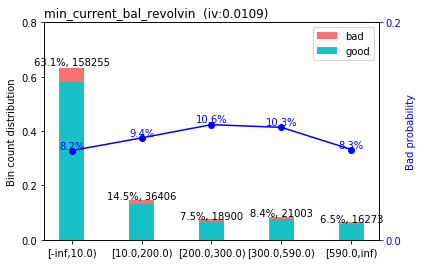

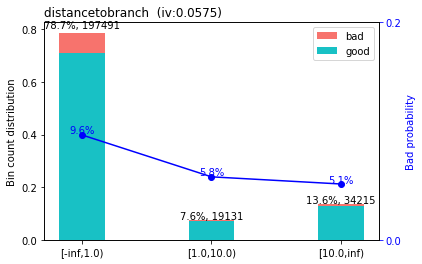

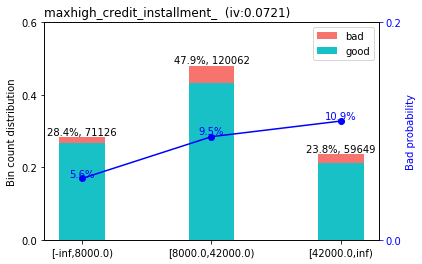

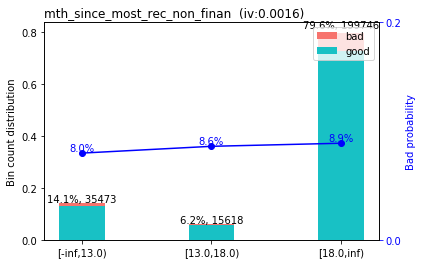

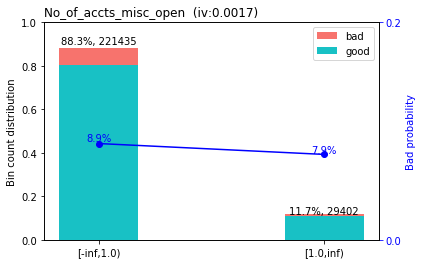

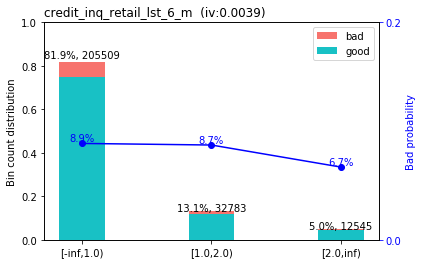

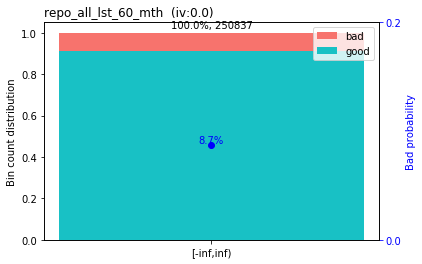

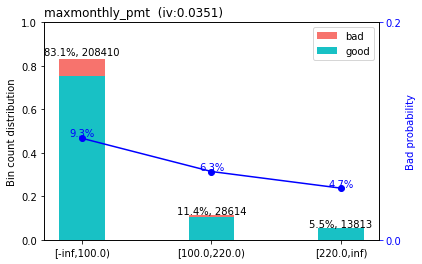

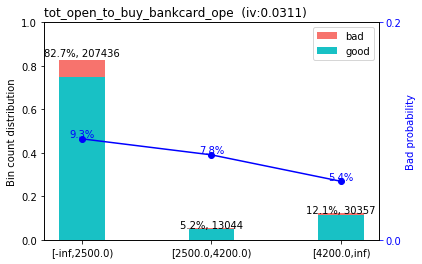

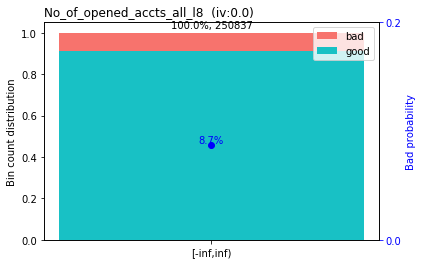

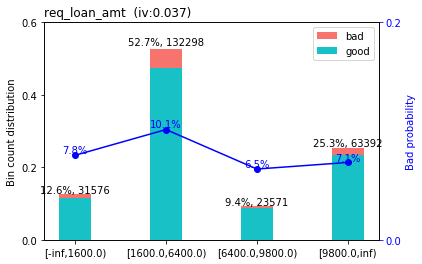

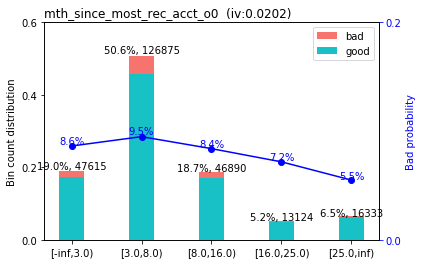

In [60]:
import scorecardpy as sc
bins=sc.woebin(df_plot, y="fund_flag",save_breaks_list='breaks_list')
plotlist=sc.woebin_plot(bins)


In [61]:
for key,i in plotlist.items():
#     plt.show(i)
    i.savefig(str(key)+'.png')

In [131]:
#save the feature and importance to an excel file
df_feat=pd.DataFrame(data=feat_importances)
# df_feat.to_excel('feat_importance_xbg4.xlsx')

upload_file(df_feat,'feat_importance_xbg4.xlsx')

In [17]:
#output the probability of being bad;
from sklearn.metrics import mean_squared_error



In [61]:
XGB.fit(X_train2, y_train)
train_pred=XGB.predict_proba(X_train2)[:,1]
test_pred=XGB.predict_proba(X_test2)[:,1]
#proposed model MAE
mean_absolute_error(y_train, train_pred)



0.14225219344261253

In [138]:
X_final=sm.add_constant(X_train2)
model_final=sm.OLS(train_pred, X_final).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.455
Date:                Tue, 14 Sep 2021   Prob (F-statistic):             0.0195
Time:                        13:02:47   Log-Likelihood:             1.7885e+05
No. Observations:              175585   AIC:                        -3.576e+05
Df Residuals:                  175534   BIC:                        -3.571e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0881      0.002     50.976      0.000       0.085       0.091
age                          -1.581e-06   1.26e-05     -0.126      0.900   -2.62e-05    2.31e-05
req_loan_amt                 -9.775e-08   6.42e-08     -1.523      0.128   -2.24e-07     2.8e-08
self_rpt_mortgage_or_rental   8.083e-09   6.58e-09      1.228      0.219   -4.82e-09     2.1e-08
self_rpt_years_at_current_a     -0.0001      0.000     -1.163      0.245      -0.000    8.59e-05
distancetobranch             -1.864e-05    1.2e-05     -1.557      0.119   -4.21e-05    4.82e-06
No_of_open_home_equity_accou    -0.0024      0.002     -1.231      0.218      -0.006       0.001
mortgage_accts_opened_within     0.0003      0.001      0.312      0.755      -0.002       0.002
tot_joint_mortgage_pmt         9.87e-07    5.5e-07      1.794      0.073   -9.16e-08    2.07e-06
mth_since_most_rec_acct_o0   -1.781e-05   2.01e-05     -0.887      0.375   -5.71e-05    2.15e-05
mth_since_most_rec_acct_18   -1.205e-05   7.27e-06     -1.657      0.098   -2.63e-05     2.2e-06
pmt_non_mortgage_closed       3.678e-07   2.08e-07      1.765      0.078   -4.07e-08    7.76e-07
maxhigh_credit_installment_  -4.184e-09   3.77e-09     -1.110      0.267   -1.16e-08     3.2e-09
tot_open_to_buy_bankcard_ope -8.721e-10   4.06e-08     -0.022      0.983   -8.04e-08    7.86e-08
min_current_bal_revolvin      5.881e-07   2.01e-07      2.922      0.003    1.94e-07    9.83e-07
tot_credit_limit_revolving_o  2.437e-08   1.51e-08      1.616      0.106   -5.18e-09    5.39e-08
pct_of_open_bkcd_gt_75pct_0      0.0002      0.001      0.374      0.709      -0.001       0.001
current_bal_revolving_closed -7.524e-08   5.03e-08     -1.495      0.135   -1.74e-07    2.34e-08
current_bal_personal_loan_in -3.136e-08   6.38e-08     -0.491      0.623   -1.56e-07    9.38e-08
worst_lst_rpt_current_rate    -9.31e-05      0.000     -0.862      0.389      -0.000       0.000
ratio_of_satisfactory_accts_    -0.0022      0.001     -1.593      0.111      -0.005       0.001
ninety_dlq_all_lst_6_           -0.0006      0.001     -0.503      0.615      -0.003       0.002
sixty_dlq_all_lst_3_m           -0.0006      0.001     -0.469      0.639      -0.003       0.002
thirty_dlq_all_lst_1_            0.0009      0.001      0.668      0.504      -0.002       0.003
sixty_plus_dlq_all_la4           0.0002      0.000      1.206      0.228      -0.000       0.001
No_of_opened_accts_credit     -1.86e-05   7.65e-05     -0.243      0.808      -0.000       0.000
No_of_opened_accts_person     9.529e-06   6.81e-05      0.140      0.889      -0.000       0.000
No_of_opened_accts_revo16    -1.474e-05      0.000     -0.121      0.903      -0.000       0.000
No_of_opened_accts_all_l8        0.0011      0.001      1.035      0.301    

In [131]:
train_pred
#y_train.mean()

array([0.08969773, 0.06721338, 0.03616887, ..., 0.01222839, 0.02085226,
       0.02679472], dtype=float32)

In [63]:
mean_absolute_error(y_test, test_pred)

0.1441809334486137

In [64]:
#test the model without home ownership;

X_train3=X_train2.drop(['SR_Hownership_Home'], axis=1)
X_test3=X_test2.drop(['SR_Hownership_Home'], axis=1)

XGB.fit(X_train3, y_train)
train1_pred=XGB.predict_proba(X_train3)[:,1]
test_pred_1=XGB.predict_proba(X_test3)[:,1]
mean_absolute_error(y_train, train1_pred)

0.14229104923811492

In [66]:
mean_absolute_error(y_test, test_pred_1)

0.144145305360173

In [67]:
#test the model without hourly;
X_train4=X_train2.drop(['SR_empstatus_Hourly'], axis=1)
X_test4=X_test2.drop(['SR_empstatus_Hourly'], axis=1)
XGB.fit(X_train4, y_train)
train2_pred=XGB.predict_proba(X_train4)[:,1]
test_pred_2=XGB.predict_proba(X_test4)[:,1]
mean_absolute_error(y_train, train2_pred)

0.14227834070157883

In [68]:
mean_absolute_error(y_test, test_pred_2)

0.14418323821900703

In [69]:
X_train5=X_train2.drop(['utm_medium_priority'], axis=1)
X_test5=X_test2.drop(['utm_medium_priority'], axis=1)
XGB.fit(X_train5, y_train)
train3_pred=XGB.predict_proba(X_train5)[:,1]
test_pred_3=XGB.predict_proba(X_test5)[:,1]
mean_absolute_error(y_train, train3_pred)

0.14291713996518382

In [70]:
mean_absolute_error(y_test, test_pred_3)

0.14476162969028475

In [80]:
diff = [abs(x - 0.08731953185067061) for x in y_test]

In [81]:
sum(diff) / len(diff)

0.15951064547859334

In [ ]:
#run hypothesis test on the error for two models in reference to the proposed model to see if the mean error is significant


In [108]:
# y_train_df=pd.DataFrame(data=y_train, columns=['Y_true'], index=X_train2.index.copy())
y_train_pred_df=pd.DataFrame(data=train_pred, columns=['Y_hats'], index=X_train2.index.copy())
y_train_pred_df1=pd.DataFrame(data=train1_pred, columns=['Y_hats1'], index=X_train3.index.copy())
y_train_pred_df2=pd.DataFrame(data=train2_pred, columns=['Y_hats2'], index=X_train4.index.copy())
y_train_pred_df3=pd.DataFrame(data=train3_pred, columns=['Y_hats3'], index=X_train5.index.copy())
df_train_error=pd.merge(y_train, y_train_pred_df, how='left', left_index=True, right_index=True)
df_train_error1=pd.merge(y_train, y_train_pred_df1, how='left', left_index=True, right_index=True)
df_train_error2=pd.merge(y_train, y_train_pred_df2, how='left', left_index=True, right_index=True)
df_train_error3=pd.merge(y_train, y_train_pred_df3, how='left', left_index=True, right_index=True)

In [109]:
df_train_error1_0=pd.merge(df_train_error,df_train_error1,how='left', left_index=True, right_index=True)
df_train_error2_0=pd.merge(df_train_error,df_train_error2,how='left', left_index=True, right_index=True)
df_train_error3_0=pd.merge(df_train_error,df_train_error3,how='left', left_index=True, right_index=True)

In [110]:
df_train_error1_0['error'] = df_train_error1_0.apply(lambda row: row.fund_flag_x -row.Y_hats, axis=1)
df_train_error1_0['error1'] = df_train_error1_0.apply(lambda row: row.fund_flag_y -row.Y_hats1, axis=1)
df_train_error2_0['error2'] = df_train_error2_0.apply(lambda row: row.fund_flag_y -row.Y_hats2, axis=1)
df_train_error3_0['error3'] = df_train_error3_0.apply(lambda row: row.fund_flag_y -row.Y_hats3, axis=1)

In [113]:
from scipy import stats
stats.ttest_ind(df_train_error1_0['error'], df_train_error1_0['error1'] ,equal_var=False)


Ttest_indResult(statistic=-0.0016952359385821554, pvalue=0.9986473990284764)

In [114]:
stats.ttest_ind(df_train_error1_0['error'], df_train_error2_0['error2'] ,equal_var=False)

Ttest_indResult(statistic=-0.003747098687853078, pvalue=0.9970102569339843)

In [115]:
stats.ttest_ind(df_train_error1_0['error'], df_train_error3_0['error3'] ,equal_var=False)

Ttest_indResult(statistic=-0.005019670320443819, pvalue=0.9959949022218213)

In [94]:
#run the validation on test data
# from common_functions import ks
import pandas as pd

#merge only the test dataset
y_test_hat=test_pred

#convert ndarray to a dataframe, so that it can merge with true y in the merge statement

y_test_hat_df=pd.DataFrame(data=y_test_hat, columns=['Y_hats'], index=X_test.index.copy())

df_out=pd.merge(y_test, y_test_hat_df, how='left', left_index=True, right_index=True)
ks_test=ks(data=df_out, target='fund_flag', prob='Y_hats')

     min_score  max_score  events  nonevents  total event_rate nonevent_rate  \
0     0.203253   0.758362    2190       5336   7526     29.10%        70.90%   
1     0.137961    0.20325    1267       6258   7525     16.84%        83.16%   
2     0.100818   0.137953     969       6556   7525     12.88%        87.12%   
3    0.0756708   0.100817     673       6852   7525      8.94%        91.06%   
4    0.0574441  0.0756699     508       7017   7525      6.75%        93.25%   
5    0.0431919  0.0574398     345       7180   7525      4.58%        95.42%   
6    0.0321869  0.0431912     253       7272   7525      3.36%        96.64%   
7    0.0227775  0.0321851     191       7334   7525      2.54%        97.46%   
8    0.0142995  0.0227768      96       7429   7525      1.28%        98.72%   
9   0.00145162  0.0142987      46       7480   7526      0.61%        99.39%   
10                           6538      68714  75252      8.69%        91.31%   

   % events % nonevents % cum_events % 

In [95]:
ks_test.to_excel('ppf_ks_xbg4.xlsx')

!aws s3 cp ppf_ks_xbg4.xlsx s3://mf-ml-ds/propensity_to_fund/output/
    

upload: ./ppf_ks_xbg4.xlsx to s3://mf-ml-ds/propensity_to_fund/output/ppf_ks_xbg4.xlsx


In [96]:
#apply scorecard to validation dataset;
df_val=pd.read_csv('s3://mf-ml-ds/propensity_to_fund/source/ppf_val3.csv')
df_val.shape

(107653, 54)

In [97]:
        
impute_ppf(df_val, ptable)

In [98]:
df_val=df_val.fillna(0)

y_val=df_val.loc[: ,'fund_flag']

y_val_FPD=df_val.loc[:,'FPD_flag']
y_val_ever60by4=df_val.loc[:,'ever60by4_flag']

X_val=df_val[feat_importances.index]

val_pred=XGB.predict_proba(X_val)[:, 1]

In [99]:
#run the validation on test data
import pandas as pd

#merge only the test dataset
y_val_hat=val_pred

#convert ndarray to a dataframe, so that it can merge with true y in the merge statement

y_val_hat_df=pd.DataFrame(data=y_val_hat, columns=['Y_hats'], index=X_val.index.copy())

df_out=pd.merge(y_val, y_val_hat_df, how='left', left_index=True, right_index=True)
ks_val=ks(data=df_out, target='fund_flag', prob='Y_hats')

    min_score  max_score  events  nonevents     total event_rate  \
0    0.199386   0.711588  3178.0     7588.0   10766.0     29.52%   
1    0.131833   0.199386  1871.0     8894.0   10765.0     17.38%   
2   0.0956746   0.131825  1291.0     9474.0   10765.0     11.99%   
3   0.0717104  0.0956737   934.0     9831.0   10765.0      8.68%   
4   0.0544007  0.0717101   716.0    10049.0   10765.0      6.65%   
5   0.0410173  0.0544002   507.0    10259.0   10766.0      4.71%   
6   0.0302633  0.0410163   354.0    10411.0   10765.0      3.29%   
7   0.0212479  0.0302633   270.0    10495.0   10765.0      2.51%   
8   0.0133524  0.0212477   184.0    10581.0   10765.0      1.71%   
9   0.0011751  0.0133523    84.0    10682.0   10766.0      0.78%   
10                        9389.0    98264.0  107653.0      8.72%   

   nonevent_rate % events % nonevents % cum_events % cum_nonevents    KS  
0         70.48%   33.85%       7.72%       33.85%           7.72%  26.1  
1         82.62%   19.93%       9

In [100]:
ks_val.to_excel('ppf_val_ks_xbg4.xlsx')

!aws s3 cp ppf_val_ks_xbg4.xlsx s3://mf-ml-ds/propensity_to_fund/output/
    

upload: ./ppf_val_ks_xbg4.xlsx to s3://mf-ml-ds/propensity_to_fund/output/ppf_val_ks_xbg4.xlsx


In [101]:
#establish baseline for PSI check 
y_val_hat_df.reset_index(drop=True, inplace=True)
y_val_hat_df.to_excel('../propensity_to_fund/model_monitor/ppfbaseline_xgb4.xlsx', index=False)

In [59]:
y_val_hat_df.head()

,Y_hats
0,0.085500
1,0.022065
2,0.015111
3,0.175169
4,0.049335


In [49]:
df_out_FPD=pd.merge(y_val_FPD, df_out, how='left', left_index=True, right_index=True)
df_out_FPD=df_out_FPD[df_out_FPD['FPD_flag'] !=2]
ks_val_FPD=ks(data=df_out_FPD, target='FPD_flag', prob='Y_hats')

     min_score  max_score  events  nonevents   total event_rate nonevent_rate  \
0     0.347233   0.716116     3.0      936.0   939.0      0.32%        99.68%   
1     0.267324   0.347155     3.0      936.0   939.0      0.32%        99.68%   
2     0.218199    0.26726     4.0      935.0   939.0      0.43%        99.57%   
3     0.179901   0.218152    11.0      928.0   939.0      1.17%        98.83%   
4     0.148652   0.179863    10.0      928.0   938.0      1.07%        98.93%   
5     0.120178   0.148645    19.0      920.0   939.0      2.02%        97.98%   
6    0.0941811   0.120155    16.0      923.0   939.0      1.70%        98.30%   
7      0.07021  0.0941794    11.0      928.0   939.0      1.17%        98.83%   
8    0.0454995   0.070174    14.0      925.0   939.0      1.49%        98.51%   
9   0.00422573   0.045472    20.0      919.0   939.0      2.13%        97.87%   
10                          111.0     9278.0  9389.0      1.18%        98.82%   

   % events % nonevents % c

In [50]:
ks_val_FPD.to_excel('ppf_val_FPD_xbg4.xlsx')

In [51]:
df_out_ever60by4=pd.merge(y_val_ever60by4, df_out, how='left', left_index=True, right_index=True)
df_out_ever60by4=df_out_ever60by4[df_out_ever60by4['ever60by4_flag'] !=2]
ks_val_ever60by4=ks(data=df_out_ever60by4, target='ever60by4_flag', prob='Y_hats')

     min_score  max_score  events  nonevents   total event_rate nonevent_rate  \
0     0.347419   0.716116     7.0      908.0   915.0      0.77%        99.23%   
1     0.267405   0.347233    11.0      904.0   915.0      1.20%        98.80%   
2     0.218896   0.267344    17.0      897.0   914.0      1.86%        98.14%   
3     0.180512   0.218879    19.0      896.0   915.0      2.08%        97.92%   
4     0.149177   0.180391    27.0      887.0   914.0      2.95%        97.05%   
5     0.120415   0.149127    30.0      885.0   915.0      3.28%        96.72%   
6    0.0943734   0.120364    36.0      879.0   915.0      3.93%        96.07%   
7    0.0702355  0.0943594    22.0      892.0   914.0      2.41%        97.59%   
8    0.0455781    0.07021    37.0      878.0   915.0      4.04%        95.96%   
9   0.00422573  0.0455302    45.0      870.0   915.0      4.92%        95.08%   
10                          251.0     8896.0  9147.0      2.74%        97.26%   

   % events % nonevents % c

In [52]:
ks_val_ever60by4.to_excel('ppf_val_ever60by4_xbg4.xlsx')

In [103]:
#apply scorecard to oot dataset;
df_oot=pd.read_csv('s3://mf-ml-ds/propensity_to_fund/source/ppf_oot3.csv')
df_oot.head()




,age,req_loan_amt,self_rpt_mortgage_or_rental,self_rpt_years_at_current_a,distancetobranch,No_of_open_home_equity_accou,mortgage_accts_opened_within,tot_joint_mortgage_pmt,mth_since_most_rec_acct_o0,mth_since_most_rec_acct_18,pmt_non_mortgage_closed,maxhigh_credit_installment_,tot_open_to_buy_bankcard_ope,min_current_bal_revolvin,tot_credit_limit_revolving_o,pct_of_open_bkcd_gt_75pct_0,current_bal_revolving_closed,current_bal_personal_loan_in,worst_lst_rpt_current_rate,ratio_of_satisfactory_accts_,ninety_dlq_all_lst_6_,sixty_dlq_all_lst_3_m,thirty_dlq_all_lst_1_,sixty_plus_dlq_all_la4,No_of_opened_accts_credit,No_of_opened_accts_person,No_of_opened_accts_revo16,No_of_opened_accts_all_l8,bkcy_accts_ch7_13_all_7,bkcy_public_recs_all_a3,repo_all_lst_60_mth,coll_gt_300_non_medical_2,mth_since_most_rec_non_finan,mth_since_most_rec_credit_ca,credit_inq_retail_lst_6_m,credit_inq_misc_lst_24_mt,ficoscore,No_of_accts_unsecured_ins,No_of_accts_sec_closed,No_of_accts_misc_open,maxmonthly_pmt,self_rpt_hhld_annual_i,borrower_type_FB,SR_empstatus_Hourly,SR_Hownership_Home,SR_OthResi,source_CK_API,contact_state_priority,ref_code_priority,utm_medium_priority,fund_flag,FPD_flag,ever60by4_flag,distancetobranch_Z
0,40,5000,NaN,0.0,NaN,0.0,0.0,0.0,4.0,14.0,0.0,20085.0,14073.0,0.0,16750.0,0.400000,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,NaN,18.0,0.0,0.0,689.0,0.0,0.0,0.0,227.47,49000.0,0,0,0,1,0,2.0,0.0,0.0,0,2,2,1
1,28,10000,NaN,NaN,7.0,0.0,0.0,0.0,3.0,35.0,14.0,33199.0,4274.0,0.0,7220.0,0.000000,547.0,0.0,6.0,0.714286,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,616.0,0.0,1.0,0.0,NaN,48720.0,0,0,0,1,0,0.0,2.0,0.0,0,2,2,0
2,43,6000,NaN,NaN,NaN,0.0,0.0,0.0,8.0,16.0,50.0,179542.0,9351.0,0.0,54900.0,0.444444,2229.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,703.0,3.0,3.0,1.0,NaN,122000.0,0,0,1,1,1,3.0,3.0,1.0,0,2,2,1
3,53,2000,NaN,NaN,38.0,0.0,0.0,0.0,8.0,52.0,0.0,0.0,544.0,6.0,550.0,0.000000,0.0,0.0,6.0,0.333333,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,NaN,NaN,1.0,0.0,628.0,0.0,5.0,0.0,NaN,54000.0,0,0,0,1,0,3.0,2.0,1.0,0,2,2,0
4,49,10000,NaN,NaN,10.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,40000.0,0,0,0,1,0,3.0,0.0,1.0,0,2,2,0


In [104]:
df_oot.groupby('fund_flag').mean()

,age,req_loan_amt,self_rpt_mortgage_or_rental,self_rpt_years_at_current_a,distancetobranch,No_of_open_home_equity_accou,mortgage_accts_opened_within,tot_joint_mortgage_pmt,mth_since_most_rec_acct_o0,mth_since_most_rec_acct_18,pmt_non_mortgage_closed,maxhigh_credit_installment_,tot_open_to_buy_bankcard_ope,min_current_bal_revolvin,tot_credit_limit_revolving_o,pct_of_open_bkcd_gt_75pct_0,current_bal_revolving_closed,current_bal_personal_loan_in,worst_lst_rpt_current_rate,ratio_of_satisfactory_accts_,ninety_dlq_all_lst_6_,sixty_dlq_all_lst_3_m,thirty_dlq_all_lst_1_,sixty_plus_dlq_all_la4,No_of_opened_accts_credit,No_of_opened_accts_person,No_of_opened_accts_revo16,No_of_opened_accts_all_l8,bkcy_accts_ch7_13_all_7,bkcy_public_recs_all_a3,repo_all_lst_60_mth,coll_gt_300_non_medical_2,mth_since_most_rec_non_finan,mth_since_most_rec_credit_ca,credit_inq_retail_lst_6_m,credit_inq_misc_lst_24_mt,ficoscore,No_of_accts_unsecured_ins,No_of_accts_sec_closed,No_of_accts_misc_open,maxmonthly_pmt,self_rpt_hhld_annual_i,borrower_type_FB,SR_empstatus_Hourly,SR_Hownership_Home,SR_OthResi,source_CK_API,contact_state_priority,ref_code_priority,utm_medium_priority,FPD_flag,ever60by4_flag,distancetobranch_Z
fund_flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,39.715862,5882.764550,2944.274638,6.019057,19.650612,0.008480,0.040206,91.291620,7.680903,29.976809,57.799366,41780.587117,1578.664534,182.251077,8992.854894,0.523315,952.556074,1038.725981,4.123467,0.860383,0.008073,0.011143,0.012336,0.897422,1.214246,1.834514,1.602578,0.035093,0.058488,0.127138,0.021953,0.087441,14.128812,10.117550,0.226535,0.934484,615.265007,4.282240,2.324185,0.123467,153.374353,66157.016446,0.074190,0.335379,0.193987,0.497608,0.502840,1.647796,1.565753,0.926669,2.000000,2.000000,0.390956
1,43.285424,5703.656679,3213.239432,6.527337,16.924900,0.012343,0.078955,102.075123,7.036843,29.538864,46.155973,57727.663164,1170.148526,202.362746,8535.560951,0.562296,904.454147,1832.482505,4.494134,0.866721,0.008365,0.010711,0.010507,0.827094,1.831378,3.230134,1.512904,0.030909,0.013057,0.180863,0.017750,0.067530,14.625652,10.687696,0.189432,1.261145,621.318303,6.568193,3.412935,0.111292,149.530536,76266.383240,0.184764,0.376943,0.313560,0.350432,0.521483,1.934078,1.904094,1.163535,0.013103,0.192687,0.515795


In [105]:
impute_ppf(df_oot, ptable)

In [106]:
df_oot=df_oot.fillna(0)



In [107]:

y_oot=df_oot.loc[: ,'fund_flag']
y_oot_FPD=df_oot.loc[:,'FPD_flag']
y_oot_ever60by4=df_oot.loc[:,'ever60by4_flag']
X_oot=df_oot[feat_importances.index]
# X_oot=df_oot[ppf_columns]

In [108]:
# X_oot2=X_oot.drop(["tot_past_due_amt_all_open"], axis=1)
# XGB=download_model('ppf_xgb_model4')

oot_pred=XGB.predict_proba(X_oot)[:, 1]


In [109]:
#merge only the validation dataset
y_oot_hat=oot_pred

#convert ndarray to a dataframe, so that it can merge with true y in the merge statement

y_oot_hat_df=pd.DataFrame(data=y_oot_hat, columns=['Y_hats'], index=X_oot.index.copy())

df_out=pd.merge(y_oot, y_oot_hat_df, how='left', left_index=True, right_index=True)

ks_oot=ks(data=df_out, target='fund_flag', prob='Y_hats')

      min_score  max_score  events  nonevents     total event_rate  \
0      0.180646    0.69759  3187.0     8731.0   11918.0     26.74%   
1      0.122714   0.180644  1884.0    10033.0   11917.0     15.81%   
2     0.0912686   0.122714  1317.0    10600.0   11917.0     11.05%   
3      0.070416   0.091262   995.0    10922.0   11917.0      8.35%   
4     0.0547095  0.0704144   793.0    11124.0   11917.0      6.65%   
5     0.0424535   0.054705   585.0    11332.0   11917.0      4.91%   
6      0.032526   0.042452   447.0    11470.0   11917.0      3.75%   
7     0.0239408   0.032526   281.0    11636.0   11917.0      2.36%   
8     0.0156732  0.0239391   219.0    11698.0   11917.0      1.84%   
9   0.000810753   0.015673   137.0    11781.0   11918.0      1.15%   
10                          9845.0   109327.0  119172.0      8.26%   

   nonevent_rate % events % nonevents % cum_events % cum_nonevents    KS  
0         73.26%   32.37%       7.99%       32.37%           7.99%  24.4  
1        

In [55]:
df_out_FPD=pd.merge(y_oot_FPD, df_out, how='left', left_index=True, right_index=True)
df_out_FPD=df_out_FPD[df_out_FPD['FPD_flag'] !=2]
ks_oot_FPD=ks(data=df_out_FPD, target='FPD_flag', prob='Y_hats')

     min_score  max_score  events  nonevents   total event_rate nonevent_rate  \
0     0.314858   0.718594     5.0      978.0   983.0      0.51%        99.49%   
1     0.241113   0.314719     4.0      978.0   982.0      0.41%        99.59%   
2     0.197581   0.241024     5.0      978.0   983.0      0.51%        99.49%   
3     0.162974   0.197532     6.0      976.0   982.0      0.61%        99.39%   
4     0.135233   0.162889     7.0      976.0   983.0      0.71%        99.29%   
5     0.109395   0.135227     9.0      973.0   982.0      0.92%        99.08%   
6    0.0878867   0.109394     8.0      975.0   983.0      0.81%        99.19%   
7    0.0668432  0.0878818    14.0      968.0   982.0      1.43%        98.57%   
8    0.0450318   0.066836    17.0      966.0   983.0      1.73%        98.27%   
9   0.00360992  0.0450056    16.0      967.0   983.0      1.63%        98.37%   
10                           91.0     9735.0  9826.0      0.93%        99.07%   

   % events % nonevents % c

In [56]:
df_out_ever60by4=pd.merge(y_oot_ever60by4, df_out, how='left', left_index=True, right_index=True)
df_out_ever60by4=df_out_ever60by4[df_out_ever60by4['ever60by4_flag'] !=2]
ks_oot_ever60by4=ks(data=df_out_ever60by4, target='ever60by4_flag', prob='Y_hats')

     min_score  max_score  events  nonevents   total event_rate nonevent_rate  \
0     0.318703   0.718594     8.0      887.0   895.0      0.89%        99.11%   
1     0.243665   0.318649     6.0      888.0   894.0      0.67%        99.33%   
2     0.199266   0.243636     5.0      890.0   895.0      0.56%        99.44%   
3      0.16419   0.199235     6.0      888.0   894.0      0.67%        99.33%   
4     0.136039   0.164186     8.0      887.0   895.0      0.89%        99.11%   
5     0.110353   0.135994    10.0      884.0   894.0      1.12%        98.88%   
6    0.0888272   0.110332     9.0      886.0   895.0      1.01%        98.99%   
7    0.0674142  0.0888149    12.0      882.0   894.0      1.34%        98.66%   
8    0.0454181  0.0674117    14.0      881.0   895.0      1.56%        98.44%   
9   0.00360992  0.0454053    21.0      874.0   895.0      2.35%        97.65%   
10                           99.0     8847.0  8946.0      1.11%        98.89%   

   % events % nonevents % c

In [67]:
#export the KS table to an excel file
ks_oot.to_excel('ppf_oot_ks_xgb4.xlsx')
!aws s3 cp ppf_oot_ks_xgb4.xlsx s3://mf-ml-ds/propensity_to_fund/output/
    

upload: ./ppf_oot_ks_xgb4.xlsx to s3://mf-ml-ds/propensity_to_fund/output/ppf_oot_ks_xgb4.xlsx


In [57]:
ks_oot_FPD.to_excel('ppf_oot_FPD_xgb4.xlsx')
ks_oot_ever60by4.to_excel('ppf_oot_ever60by4_xgb4.xlsx')

In [110]:
upload_model(XGB, 'ppf_xgb_model4')



In [64]:
#calculate PSI for score;
import math
psitable=psi(test_pred, oot_pred, group=10)

   lowercut  uppercut  ben_cnt   ben_pct  comp_cnt  comp_pct  pct_diff  \
0  0.001154  0.014010   7526.0  0.100011    8085.0  0.067845  0.032166   
1  0.014011  0.022481   7526.0  0.100011   10888.0  0.091366  0.008645   
2  0.022479  0.032018   7525.0  0.099997   12268.0  0.102946 -0.002949   
3  0.032019  0.043259   7525.0  0.099997   13013.0  0.109198 -0.009201   
4  0.043265  0.057397   7525.0  0.099997   13487.0  0.113175 -0.013178   
5  0.057397  0.075754   7525.0  0.099997   13388.0  0.112345 -0.012347   
6  0.075757  0.100228   7525.0  0.099997   13299.0  0.111598 -0.011600   
7  0.100230  0.136978   7525.0  0.099997   12889.0  0.108157 -0.008160   
8  0.136982  0.201407   7525.0  0.099997   11961.0  0.100370 -0.000373   
9  0.201426  0.747331   7525.0  0.099997    9875.0  0.082866  0.017132   

   info_odds       psi  
0   0.388053  0.012482  
1   0.090403  0.000781  
2  -0.029063  0.000086  
3  -0.088018  0.000810  
4  -0.123795  0.001631  
5  -0.116428  0.001438  
6  -0.1097

# plot partial dependence plot for the top 10 attributes

In [126]:
# from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.inspection.partial_dependence import partial_dependence, plot_partial_dependence
# from sklearn.ensemble import GradientBoostingClassifier




In [123]:
feat_importances.nlargest(30).index


Index(['utm_medium_priority', 'ref_code_priority', 'No_of_opened_accts_person',
       'distancetobranch_Z', 'No_of_accts_sec_closed', 'borrower_type_FB',
       'self_rpt_mortgage_or_rental', 'No_of_accts_unsecured_ins',
       'source_CK_API', 'maxmonthly_pmt', 'contact_state_priority',
       'ficoscore', 'sixty_plus_dlq_all_la4', 'req_loan_amt', 'age',
       'maxhigh_credit_installment_', 'mortgage_accts_opened_within',
       'self_rpt_hhld_annual_i', 'distancetobranch', 'SR_Hownership_Home',
       'bkcy_public_recs_all_a3', 'ratio_of_satisfactory_accts_',
       'tot_credit_limit_revolving_o', 'tot_open_to_buy_bankcard_ope',
       'bkcy_accts_ch7_13_all_7', 'self_rpt_years_at_current_a',
       'pmt_non_mortgage_closed', 'mth_since_most_rec_credit_ca',
       'No_of_opened_accts_credit', 'No_of_opened_accts_revo16'],
      dtype='object')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/inspection/_partial_dependence.py:715: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  FutureWarning)


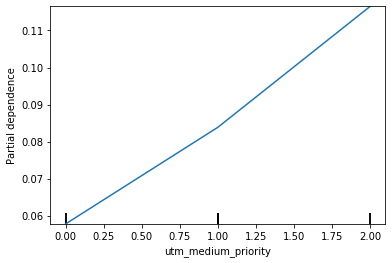

In [28]:
fig = plt.figure()
plot_partial_dependence(XGB, X_train2, ['utm_medium_priority'], fig=fig)
plt.show()


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/inspection/_partial_dependence.py:715: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  FutureWarning)


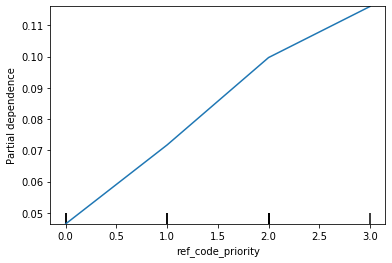

In [29]:
fig = plt.figure()
plot_partial_dependence(XGB, X_train2, ['ref_code_priority'], fig=fig)
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/inspection/_partial_dependence.py:715: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  FutureWarning)


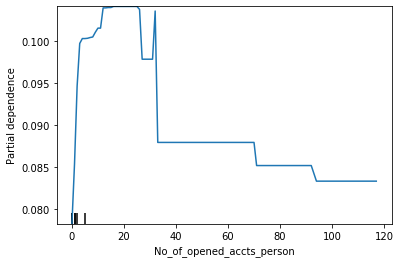

In [32]:
fig = plt.figure()
plot_partial_dependence(XGB, X_train2, ['No_of_opened_accts_person'], fig=fig)
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/inspection/_partial_dependence.py:715: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  FutureWarning)


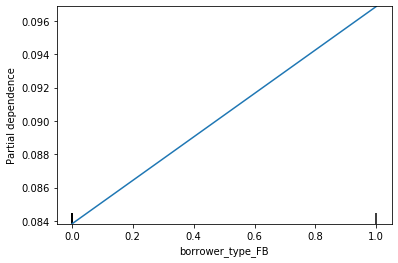

In [33]:
fig = plt.figure()
plot_partial_dependence(XGB, X_train2, ['borrower_type_FB'], fig=fig)
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/inspection/_partial_dependence.py:715: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  FutureWarning)


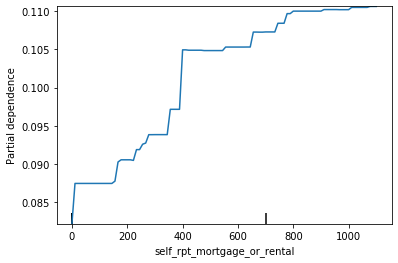

In [34]:
fig = plt.figure()
plot_partial_dependence(XGB, X_train2, ['self_rpt_mortgage_or_rental'], fig=fig)
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/inspection/_partial_dependence.py:715: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  FutureWarning)


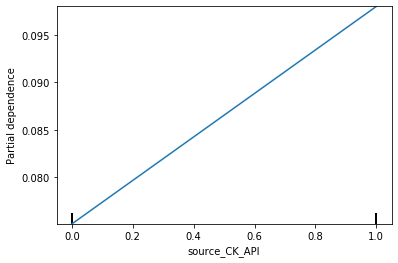

In [35]:
fig = plt.figure()
plot_partial_dependence(XGB, X_train2, ['source_CK_API'], fig=fig)
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/inspection/_partial_dependence.py:715: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  FutureWarning)


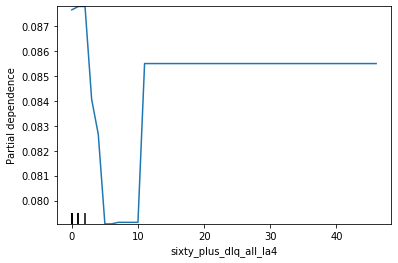

In [36]:
fig = plt.figure()
plot_partial_dependence(XGB, X_train2, ['sixty_plus_dlq_all_la4'], fig=fig)
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/inspection/_partial_dependence.py:715: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  FutureWarning)


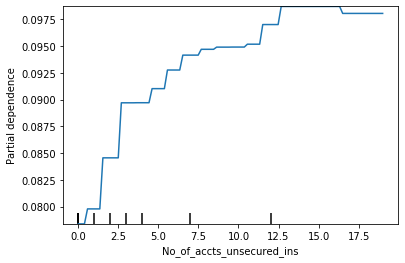

In [37]:
fig = plt.figure()
plot_partial_dependence(XGB, X_train2, ['No_of_accts_unsecured_ins'], fig=fig)
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/inspection/_partial_dependence.py:715: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  FutureWarning)


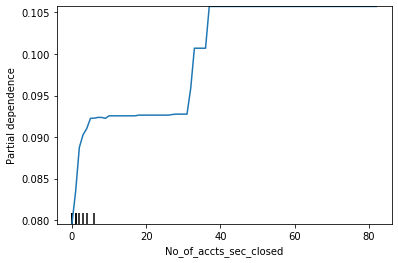

In [38]:
fig = plt.figure()
plot_partial_dependence(XGB, X_train2, ['No_of_accts_sec_closed'], fig=fig)
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/inspection/_partial_dependence.py:715: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  FutureWarning)


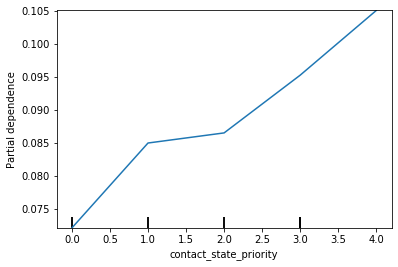

In [69]:
fig = plt.figure()
plot_partial_dependence(XGB, X_train2, ['contact_state_priority'], fig=fig)
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/inspection/_partial_dependence.py:715: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  FutureWarning)


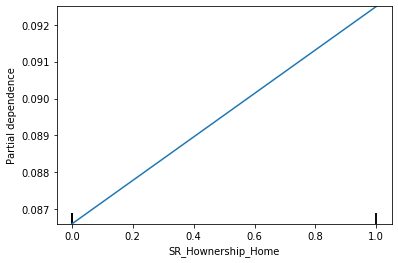

In [127]:

fig = plt.figure()
plot_partial_dependence(XGB, X_train2, ['SR_Hownership_Home'], fig=fig)
plt.show()


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/inspection/_partial_dependence.py:715: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  FutureWarning)


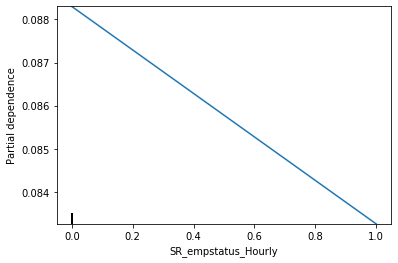

In [128]:
fig = plt.figure()
plot_partial_dependence(XGB, X_train2, ['SR_empstatus_Hourly'], fig=fig)
plt.show()